# Do logarithmic proximity measures outperform plain ones in graph clustering?

In [1]:
import os
os.environ["OPENBLAS_NUM_THREADS"] = "1"
import warnings
warnings.filterwarnings("ignore")
import sys
sys.path.append('../..')

In [2]:
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm_notebook as tqdm
from sklearn.metrics import adjusted_rand_score

In [3]:
from pygraphs.graphs.generator import StochasticBlockModel
from pygraphs.measure import H_kernels_plus_RSP_FE
from pygraphs.cluster.ward import Ward
from pygraphs.scenario import ParallelByGraphs, measures_right_order, d3_right_order
from pygraphs.util import load_or_calc_and_save, ddict2dict

## 5. Graphs with classes of different sizes

The $G(N,(m)p_{in}, p_{out})$ model generates graphs with nodes divided into classes of the same size. We now consider graphs with $N = 100$ nodes divided into two classes of different sizes. The size of the first class, $N_1$, is shown along the horizontal axis in Fig. 6.

### 5.1 Vary first class

In [4]:
@load_or_calc_and_save('results/5_2class_2.pkl')
def calc():
    results = defaultdict(lambda: defaultdict(list))
    classic_plot = ParallelByGraphs(adjusted_rand_score, np.linspace(0, 1, 51), progressbar=True)
    for first_class in tqdm([1, 2, 3, 7] + list(range(0, 51, 5))):
        graphs, info = StochasticBlockModel(100, 2, 0.3, 0.1, cluster_sizes=[first_class, 100 - first_class]) \
                                                                                                .generate_graphs(200)
        for measure_class in H_kernels_plus_RSP_FE:
            x, y, error = classic_plot.perform(Ward, measure_class, graphs, 2, n_jobs=12)
            _, best_y = sorted(zip(x, y), key=lambda x: -x[1])[0]
            mean_y = np.mean(y)
            results[measure_class.name][first_class] = (best_y, mean_y)
    return ddict2dict(results)

results = calc()

File exist! Skip calculations


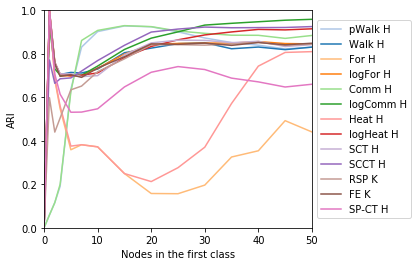

In [5]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,1,1)

d3c = (x for x in d3_right_order)

for measure_name in measures_right_order:
    measure_result = results[measure_name]
    x, y = zip(*sorted([(x, y[0]) for x, y in measure_result.items()], key=lambda x: x[0]))
    ax.plot(x, y, label=measure_name, color=d3c.__next__())

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.set_xlabel('Nodes in the first class')
ax.set_ylabel('ARI')
ax.set_xlim(0, 50)
ax.set_ylim(0, 1)

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.savefig(filename[:-4] + '.png', bbox_inches='tight', dpi=400)
# gcf().suptitle("Fig. 6 Graphs with two classes of different sizes: clustering with optimal parameter values");

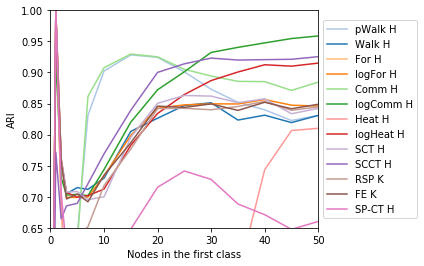

In [6]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,1,1)

d3c = (x for x in d3_right_order)

for measure_name in measures_right_order:
    measure_result = results[measure_name]
    x, y = zip(*sorted([(x, y[0]) for x, y in measure_result.items()], key=lambda x: x[0]))
    ax.plot(x, y, label=measure_name, color=d3c.__next__())

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.set_xlabel('Nodes in the first class')
ax.set_ylabel('ARI')
ax.set_xlim(0, 50)
ax.set_ylim(0.65, 1)

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.savefig(filename[:-4] + '.png', bbox_inches='tight', dpi=400)
# gcf().suptitle("Fig. 6 Graphs with two classes of different sizes: clustering with optimal parameter values");

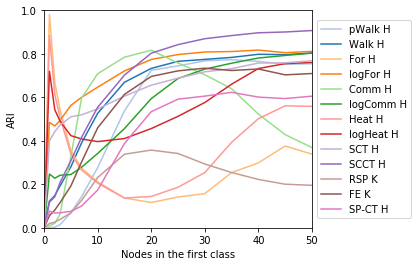

In [7]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,1,1)

d3c = (x for x in d3_right_order)

for measure_name in measures_right_order:
    measure_result = results[measure_name]
    x, y = zip(*sorted([(x, y[1]) for x, y in measure_result.items()], key=lambda x: x[0]))
    ax.plot(x, y, label=measure_name, color=d3c.__next__())

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.set_xlabel('Nodes in the first class')
ax.set_ylabel('ARI')
ax.set_xlim(0, 50)
ax.set_ylim(0, 1)

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.savefig(filename[:-4] + '.png', bbox_inches='tight', dpi=400)
# gcf().suptitle("Fig. 7 Graphs with two classes of different sizes: random parameter values");

## Six clusters

In [8]:
cluster_sizes = [65, 35, 25, 13, 8, 4]

probability_matrix = np.array([
    [0.30, 0.20, 0.10, 0.15, 0.07, 0.25],
    [0.20, 0.24, 0.08, 0.13, 0.05, 0.17],
    [0.10, 0.08, 0.16, 0.09, 0.04, 0.12],
    [0.15, 0.13, 0.09, 0.20, 0.02, 0.14],
    [0.07, 0.05, 0.04, 0.02, 0.12, 0.04],
    [0.25, 0.17, 0.12, 0.14, 0.04, 0.40]
])

In [9]:
@load_or_calc_and_save('results/5_six_2.pkl')
def calc():
    results = {}
    graphs, info = StochasticBlockModel(150, 6, cluster_sizes=cluster_sizes, probability_matrix=probability_matrix) \
                    .generate_graphs(100)
    classic_plot = ParallelByGraphs(adjusted_rand_score, np.linspace(0, 1, 51), progressbar=True)
    for measure_class in H_kernels_plus_RSP_FE:
        x, y, error = classic_plot.perform(Ward, measure_class, graphs, 2, n_jobs=12)
        results[measure_class.name] = (x, y, error)
    return results

results = calc()

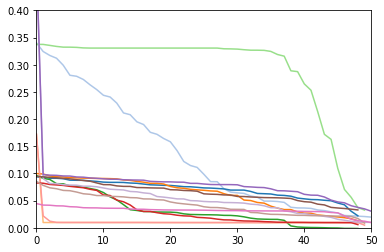

In [10]:
d3c = (x for x in d3_right_order)
for measure_name in measures_right_order:
    x, y, error = results[measure_name]
    plt.plot(range(len(y)), sorted(y, reverse=True), color=d3c.__next__())
plt.xlim(0, 50)
plt.ylim(0, 0.4)
plt.show()